<a href="https://colab.research.google.com/github/rajshribedse/Logistic_regression/blob/main/BigMart_Sales_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BigMart Sales Prediction**

## 1. **Introduction**

#**Objective**
* The objective of this project is to predict sales revenue for different products using a machine learning model, the Random Forest Regressor, to assist businesses in inventory and marketing strategies.


## 2. **Importing Libraries**
*  pandas and numpy for data manipulation
*  plotly for interactive visualizations
*  sklearn for model building and evaluation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 3. **Loading the Data**

In [2]:
data = pd.read_csv('SalesData.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Key Information About Dataset Attributes**
Below is a description of each attribute in the dataset:
- **Product_ID**: Unique identifier for each product.
- **Store_ID**: Identifier for the store.
- **Sales**: The target variable representing sales revenue (in dollars).
- **Marketing_Spend**: Money spent on marketing campaigns for the product.
- Identify the most important attributes through correlation analysis.

In [4]:
data.columns = [
    'Product_ID', 'Product_Weight', 'Product_Fat_Content', 'Product_Visibility_Percentage',
'Product_Category', 'Product_MRP', 'Store_ID', 'Store_Established_Year',
'Store_Size', 'Store_Location_Type', 'Store_Type', 'Product_Sales'

]


In [5]:
data.head(1)

,Product_ID,Product_Weight,Product_Fat_Content,Product_Visibility_Percentage,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [6]:
data.sample(5)

,Product_ID,Product_Weight,Product_Fat_Content,Product_Visibility_Percentage,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales
3274,NCG18,15.3,Low Fat,0.023072,Household,101.8332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1025.3320
2209,FDH10,NaN,Low Fat,0.086327,Snack Foods,192.6478,OUT019,1985,Small,Tier 1,Grocery Store,387.4956
4498,DRG03,NaN,Low Fat,0.061686,Dairy,153.9998,OUT027,1985,Medium,Tier 3,Supermarket Type3,5229.1932
6703,FDA23,9.8,Low Fat,0.047260,Baking Goods,102.8016,OUT049,1999,Medium,Tier 1,Supermarket Type1,1922.8304
7338,FDL03,NaN,Regular,0.026949,Meat,197.7110,OUT027,1985,Medium,Tier 3,Supermarket Type3,4910.2750


**Find Shape of our Dataset**

In [7]:
data.shape

(8523, 12)

In [8]:
data.describe(include='all')

,Product_ID,Product_Weight,Product_Fat_Content,Product_Visibility_Percentage,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


## **Check Null Values In The Dataset**

In [9]:
data.isnull().sum().sort_values(ascending=False)

,0
Store_Size,2410
Product_Weight,1463
Product_ID,0
Product_Fat_Content,0
Product_Visibility_Percentage,0
Product_Category,0
Product_MRP,0
Store_ID,0
Store_Established_Year,0
Store_Location_Type,0


In [10]:
per = (data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)
print(per)

Store_Size                       28.276428
Product_Weight                   17.165317
Product_ID                        0.000000
Product_Fat_Content               0.000000
Product_Visibility_Percentage     0.000000
Product_Category                  0.000000
Product_MRP                       0.000000
Store_ID                          0.000000
Store_Established_Year            0.000000
Store_Location_Type               0.000000
Store_Type                        0.000000
Product_Sales                     0.000000
dtype: float64


## **Duplicate Values**

In [11]:
data.duplicated().any()

False

## **Handling The Missing Values**

In [12]:
data['Product_Weight']

,Product_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [13]:
data['Store_Size']

,Store_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


## **Univariate Imputation**

In [14]:
data.columns

Index(['Product_ID', 'Product_Weight', 'Product_Fat_Content',
       'Product_Visibility_Percentage', 'Product_Category', 'Product_MRP',
       'Store_ID', 'Store_Established_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Product_Sales'],
      dtype='object')

In [15]:
mean_weight = data['Product_Weight'].mean()
median_weight = data['Product_Weight'].median()

In [16]:
print(mean_weight, median_weight)

12.857645184135976 12.6


In [17]:
data['Product_Weight_mean'] = data['Product_Weight'].fillna(mean_weight)
data['Product_Weight_median'] = data['Product_Weight'].fillna(median_weight)

In [18]:
data.head(50)

,Product_ID,Product_Weight,Product_Fat_Content,Product_Visibility_Percentage,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales,Product_Weight_mean,Product_Weight_median
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300000,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920000,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500000,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200000,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930000,8.930
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.395000,10.395
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,13.650000,13.650
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.857645,12.600
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,16.200000,16.200
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,19.200000,19.200


In [19]:
print("Original Weight variable variance", data['Product_Weight'].var())
print("Product Weight variance after mean imputation", data['Product_Weight_mean'].var())
print("Product Weight variance after median imputation", data['Product_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Product Weight variance after mean imputation 17.860121735060453
Product Weight variance after median imputation 17.869561454073366


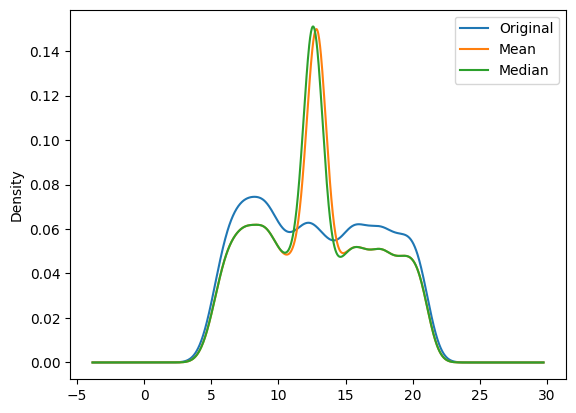

In [20]:
data['Product_Weight'].plot(kind= "kde", label="Original")
data['Product_Weight_mean'].plot(kind= "kde", label= "Mean")
data['Product_Weight_median'].plot(kind= "kde", label= "Median")

plt.legend()
plt.show()

<Axes: >

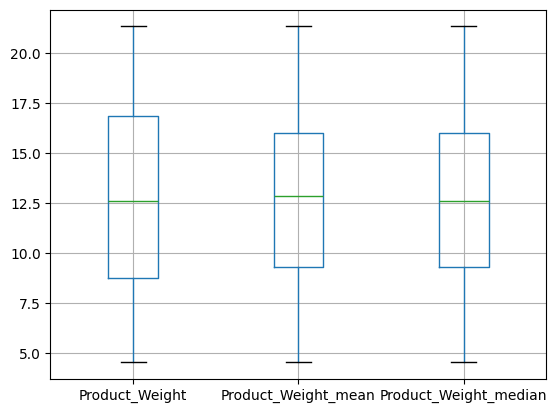

In [21]:
data[['Product_Weight', 'Product_Weight_mean', 'Product_Weight_median']].boxplot()

 * **The first box plot ("Product_Weight") shows the distribution of the original product weight values, including potential missing values.**
* **The second box plot ("Product_Weight_mean") shows the data after filling missing values with the mean of the column. Notice that the median (green line) might have shifted slightly compared to the original data.**
* **The third box plot ("Product_Weight_median") shows the data after filling missing values with the median of the column. The median itself remains unchanged, but the spread of the data may have been affected.**

In [25]:
data['Product_Weight_interploate'] = data['Product_Weight'].interpolate(method="linear")

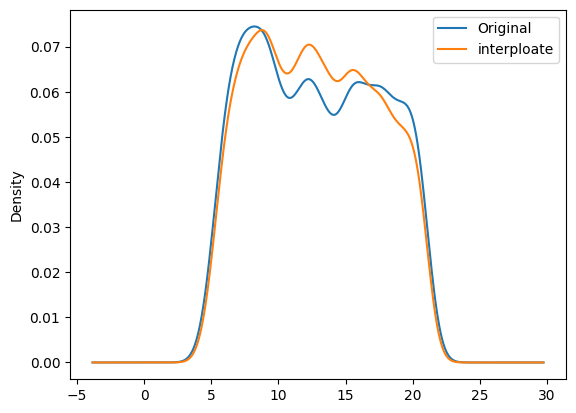

In [26]:
data['Product_Weight'].plot(kind= "kde", label ="Original")
data['Product_Weight_interploate'].plot(kind = "kde", label = "interploate")

plt.legend()
plt.show()

## **Multivariate Imputation**

In [27]:
from sklearn.impute import KNNImputer

In [28]:
knn = KNNImputer(n_neighbors=10, weights="distance")

In [29]:
data['knn_imputer'] = knn.fit_transform(data[['Product_Weight']]).ravel()

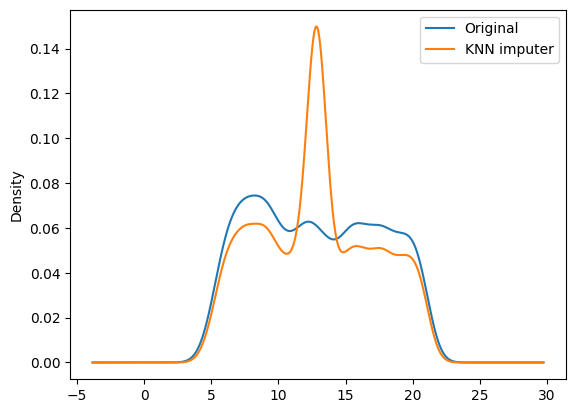

In [30]:
data['Product_Weight'].plot(kind="kde", label="Original")
data['knn_imputer'].plot(kind="kde", label="KNN imputer")

plt.legend()
plt.show()

In [31]:
data = data.drop(['Product_Weight','Product_Weight_mean','Product_Weight_median','knn_imputer'],axis=1)


In [32]:
data.head(1)

,Product_ID,Product_Fat_Content,Product_Visibility_Percentage,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales,Product_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [33]:
data.isnull().sum().sort_values(ascending=False)

,0
Store_Size,2410
Product_ID,0
Product_Fat_Content,0
Product_Visibility_Percentage,0
Product_Category,0
Product_MRP,0
Store_ID,0
Store_Established_Year,0
Store_Location_Type,0
Store_Type,0


## **Store_Size**

In [34]:
data['Store_Size'].value_counts()

,count
Store_Size,
Medium,2793
Small,2388
High,932


In [35]:
data['Store_Type'].value_counts()

,count
Store_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [36]:
mode_store = data.pivot_table(values='Store_Size',columns='Store_Type',aggfunc=(lambda x:x.mode()[0]))


In [37]:
mode_store

Store_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Store_Size,Small,Small,Medium,Medium


In [38]:
missing_values = data['Store_Size'].isnull()

In [39]:
missing_values

,Store_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [40]:
data.loc[missing_values,'Store_Size'] = data.loc[missing_values,'Store_Type'].apply(lambda x :mode_store[x])


In [41]:
data.isnull().sum()

,0
Product_ID,0
Product_Fat_Content,0
Product_Visibility_Percentage,0
Product_Category,0
Product_MRP,0
Store_ID,0
Store_Established_Year,0
Store_Size,0
Store_Location_Type,0
Store_Type,0


## **Product_Fat_Content**

In [42]:
data.columns

Index(['Product_ID', 'Product_Fat_Content', 'Product_Visibility_Percentage',
       'Product_Category', 'Product_MRP', 'Store_ID', 'Store_Established_Year',
       'Store_Size', 'Store_Location_Type', 'Store_Type', 'Product_Sales',
       'Product_Weight_interploate'],
      dtype='object')

In [43]:
data['Product_Fat_Content'].value_counts()

,count
Product_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [44]:
data.replace({'Product_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}}, inplace= True)

In [45]:
data['Product_Fat_Content'].value_counts()

,count
Product_Fat_Content,
Low Fat,5517
Regular,3006


## **Product_Visibility_Percentage**

In [46]:
data.columns

Index(['Product_ID', 'Product_Fat_Content', 'Product_Visibility_Percentage',
       'Product_Category', 'Product_MRP', 'Store_ID', 'Store_Established_Year',
       'Store_Size', 'Store_Location_Type', 'Store_Type', 'Product_Sales',
       'Product_Weight_interploate'],
      dtype='object')

In [47]:
data['Product_Visibility_Percentage'].value_counts()

,count
Product_Visibility_Percentage,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


In [48]:
data['Product_Visibility_Percentage_interpolate'] = data['Product_Visibility_Percentage'].replace(0,np.nan).interpolate(method='linear')

In [49]:
data.head(1)

,Product_ID,Product_Fat_Content,Product_Visibility_Percentage,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales,Product_Weight_interploate,Product_Visibility_Percentage_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [50]:
data['Product_Visibility_Percentage_interpolate'].value_counts()

,count
Product_Visibility_Percentage_interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


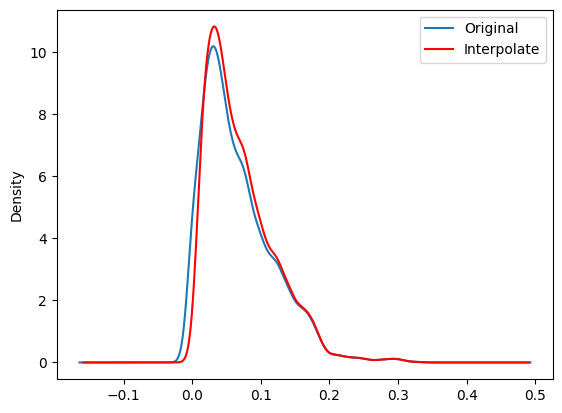

In [51]:
data['Product_Visibility_Percentage'].plot(kind="kde", label="Original")
data['Product_Visibility_Percentage_interpolate'].plot(kind="kde", color='red', label="Interpolate")

plt.legend()
plt.show()

In [52]:
data = data.drop('Product_Visibility_Percentage', axis=1)

In [53]:
data.head(1)

,Product_ID,Product_Fat_Content,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales,Product_Weight_interploate,Product_Visibility_Percentage_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [54]:
data.columns

Index(['Product_ID', 'Product_Fat_Content', 'Product_Category', 'Product_MRP',
       'Store_ID', 'Store_Established_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Product_Sales',
       'Product_Weight_interploate',
       'Product_Visibility_Percentage_interpolate'],
      dtype='object')

## **Product_Category**

In [55]:
data['Product_Category'].value_counts()

,count
Product_Category,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


## **Product_ID**

In [56]:
data['Product_ID'].value_counts().sample(5)

,count
Product_ID,
FDJ32,4
NCL31,9
FDB44,5
FDT49,8
FDP27,7


In [57]:
data['Product_ID'] = data['Product_ID'].apply(lambda x: x[:2])

In [58]:
data['Product_ID'].value_counts()

,count
Product_ID,
FD,6125
NC,1599
DR,799


## **Store_Established_Year**

In [59]:
data['Store_Established_Year']

,Store_Established_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


In [60]:
import datetime as dt

In [61]:
current_year = dt.datetime.today().year

In [62]:
current_year

2024

In [63]:
data['Store_age'] = current_year - data['Store_Established_Year']

In [64]:
data.head(1)

,Product_ID,Product_Fat_Content,Product_Category,Product_MRP,Store_ID,Store_Established_Year,Store_Size,Store_Location_Type,Store_Type,Product_Sales,Product_Weight_interploate,Product_Visibility_Percentage_interpolate,Store_age
0,FD,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [65]:
data.drop('Store_Established_Year',axis=1, inplace=True)

In [66]:
data

,Product_ID,Product_Fat_Content,Product_Category,Product_MRP,Store_ID,Store_Size,Store_Location_Type,Store_Type,Product_Sales,Product_Weight_interploate,Product_Visibility_Percentage_interpolate,Store_age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.920,0.019278,15
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.200,0.015755,26
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,Low Fat,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,6.865,0.056783,37
8519,FD,Regular,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,8.380,0.046982,22
8520,NC,Low Fat,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,10.600,0.035186,20
8521,FD,Regular,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,7.210,0.145221,15


## **Handling Categorical Columns**

In [67]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [68]:
data_encoded

,Product_ID,Product_Fat_Content,Product_Category,Product_MRP,Store_ID,Store_Size,Store_Location_Type,Store_Type,Product_Sales,Product_Weight_interploate,Product_Visibility_Percentage_interpolate,Store_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,2778.3834,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,549.2850,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,1193.1136,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,1845.5976,7.210,0.145221,15


In [69]:
X = data_encoded.drop('Product_Sales',axis=1)
y = data_encoded['Product_Sales']

In [70]:
y

,Product_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


# **Random Forest Regressor**

In [71]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.555040442702387


# **XGBRFRegressor**


In [72]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5951283683315813


# **XGBRFRegressor Feature importances**


In [73]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Store_Type,0.364966
5,Store_Size,0.178446
10,Store_age,0.148148
4,Store_ID,0.136959
3,Product_MRP,0.135346
6,Store_Location_Type,0.028170
9,Product_Visibility_Percentage_interpolate,0.002421
8,Product_Weight_interploate,0.002282
2,Product_Category,0.001651
1,Product_Fat_Content,0.000879


In [74]:
data.columns

Index(['Product_ID', 'Product_Fat_Content', 'Product_Category', 'Product_MRP',
       'Store_ID', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Product_Sales', 'Product_Weight_interploate',
       'Product_Visibility_Percentage_interpolate', 'Store_age'],
      dtype='object')

In [75]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Product_Visibility_Percentage_interpolate','Product_Weight_interploate',
'Product_Category','Store_Location_Type','Product_ID','Product_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5962374330802511


In [76]:
final_data = X.drop(columns=['Product_Visibility_Percentage_interpolate','Product_Weight_interploate',
'Product_Category','Store_Location_Type','Product_ID','Product_Fat_Content'],axis=1)

In [77]:
final_data

,Product_MRP,Store_ID,Store_Size,Store_Type,Store_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


## **Best Model**


In [78]:
from xgboost import XGBRFRegressor


In [80]:
xg_final = XGBRFRegressor()

In [81]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)
xg_final.fit(X_train,y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [83]:
y_pred = xg_final.predict(X_test)
mean_absolute_error(y_test,y_pred)

714.6033522105251

## **Prediction on Unseen Data**


In [87]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2067.009


In [88]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1352.589033203125 and 2781.429033203125
